## Benchmarks Vizualization

In this notebook I Create plots of models performance

In [2]:
# imports
import json
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 1. Classical models
# res_path = "./bench_results_xsum.json"
# ds_name = "XSum"
# res_path = "./bench_results_cnn_daily+mytextrank.json"
res_path = "./bench_results_cnn_daily_last.json"
ds_name = "CNN_Daily"
bench_results = json.load(open(res_path, 'r'))
pprint(bench_results)

{'CourpusPreprocessor(mid)': {'KL': {'BLEU-1': 0.2547491475888943,
                                     'BLEU-2': 0.1485146598939891,
                                     'BLEU-3': 0.09903989492993166,
                                     'BLEU-4': 0.07257330707603102,
                                     'ROUGE-1-fmeasure': 0.2909479784435467,
                                     'ROUGE-1-recall': 0.3736624390956721,
                                     'ROUGE-2-fmeasure': 0.10294361262245369,
                                     'ROUGE-2-recall': 0.13233878477240044,
                                     'ROUGE-L-fmeasure': 0.19411632643997556,
                                     'ROUGE-L-recall': 0.25111516891854235},
                              'LexRank': {'BLEU-1': 0.24234428289355592,
                                          'BLEU-2': 0.1454105238410503,
                                          'BLEU-3': 0.09978739377071438,
                                          'BLEU-4':

In [4]:
# DETERMINE Best preprocessor
metric_names = list(bench_results['CourpusPreprocessor(mid)']['KL'].keys())
prep_names = list(bench_results.keys())
model_names = list(bench_results['CourpusPreprocessor(mid)'].keys())
print(f"Metric names: {metric_names}")
print(f"Prep names: {prep_names}")
print(f"Model names: {model_names}")
metric_prep_avg = dict(zip(
    metric_names, [dict(zip(prep_names, [0.0 for _ in range(len(prep_names))])) for _ in range(len(metric_names))]))
# pprint(metric_prep_avg)
for prep in bench_results:
    for model in bench_results[prep]:
        for metric in bench_results[prep][model]:
            metric_prep_avg[metric][prep] += bench_results[prep][model][metric]
pprint(metric_prep_avg)

Metric names: ['BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4', 'ROUGE-1-fmeasure', 'ROUGE-2-fmeasure', 'ROUGE-L-fmeasure', 'ROUGE-1-recall', 'ROUGE-2-recall', 'ROUGE-L-recall']
Prep names: ['CourpusPreprocessor(strong)', 'CourpusPreprocessor(mid)', 'CourpusPreprocessor(simple)', 'CourpusPreprocessor(nothing)']
Model names: ['TextRank', 'LexRank', 'Lsa', 'Luhn', 'KL']
{'BLEU-1': {'CourpusPreprocessor(mid)': 1.1420989090205182,
            'CourpusPreprocessor(nothing)': 1.0278882080325762,
            'CourpusPreprocessor(simple)': 1.1191657805687627,
            'CourpusPreprocessor(strong)': 1.123204935156878},
 'BLEU-2': {'CourpusPreprocessor(mid)': 0.6704355110731401,
            'CourpusPreprocessor(nothing)': 0.597438325520389,
            'CourpusPreprocessor(simple)': 0.6677517854915074,
            'CourpusPreprocessor(strong)': 0.695257904268352},
 'BLEU-3': {'CourpusPreprocessor(mid)': 0.4534574694930505,
            'CourpusPreprocessor(nothing)': 0.40531465693804897,
            'C

In [5]:
metric_prep_max = {
    metric: max(metric_prep_avg[metric], key=lambda k: metric_prep_avg[metric][k]) for metric in metric_prep_avg
}
pprint(metric_prep_max)

{'BLEU-1': 'CourpusPreprocessor(mid)',
 'BLEU-2': 'CourpusPreprocessor(strong)',
 'BLEU-3': 'CourpusPreprocessor(strong)',
 'BLEU-4': 'CourpusPreprocessor(simple)',
 'ROUGE-1-fmeasure': 'CourpusPreprocessor(nothing)',
 'ROUGE-1-recall': 'CourpusPreprocessor(simple)',
 'ROUGE-2-fmeasure': 'CourpusPreprocessor(strong)',
 'ROUGE-2-recall': 'CourpusPreprocessor(strong)',
 'ROUGE-L-fmeasure': 'CourpusPreprocessor(strong)',
 'ROUGE-L-recall': 'CourpusPreprocessor(strong)'}


In [6]:
# 2. Find best model with CourpusPreprocessor(simple)
prep = "CourpusPreprocessor(simple)"
# prep = "CourpusPreprocessor(nothing)"

metric_model = {
    metric: {} for metric in metric_names
}

for metric in metric_names:
    for model in model_names:
        metric_model[metric][model] = bench_results[prep][model][metric]

pprint(metric_model)

{'BLEU-1': {'KL': 0.24968149745197965,
            'LexRank': 0.23695496783416722,
            'Lsa': 0.24076173679348284,
            'Luhn': 0.20634588854980979,
            'TextRank': 0.18542168993932326},
 'BLEU-2': {'KL': 0.14726940520022277,
            'LexRank': 0.1454868589083665,
            'Lsa': 0.13514259438248827,
            'Luhn': 0.12835771953462827,
            'TextRank': 0.11149520746580155},
 'BLEU-3': {'KL': 0.09956542312550418,
            'LexRank': 0.10098275994204632,
            'Lsa': 0.09062133151173664,
            'Luhn': 0.09032413704150713,
            'TextRank': 0.07588283900285715},
 'BLEU-4': {'KL': 0.07394639674190365,
            'LexRank': 0.0758662800833772,
            'Lsa': 0.06672977242544659,
            'Luhn': 0.06870857273453135,
            'TextRank': 0.056390000863920466},
 'ROUGE-1-fmeasure': {'KL': 0.2891911363283046,
                      'LexRank': 0.3188969052851063,
                      'Lsa': 0.2990799293116909,
           

In [7]:
metric_model_max = {
    metric: max(metric_model[metric], key=lambda k: metric_model[metric][k]) for metric in metric_model
}

pprint(metric_model_max)

{'BLEU-1': 'KL',
 'BLEU-2': 'KL',
 'BLEU-3': 'LexRank',
 'BLEU-4': 'LexRank',
 'ROUGE-1-fmeasure': 'LexRank',
 'ROUGE-1-recall': 'Luhn',
 'ROUGE-2-fmeasure': 'LexRank',
 'ROUGE-2-recall': 'Luhn',
 'ROUGE-L-fmeasure': 'LexRank',
 'ROUGE-L-recall': 'Luhn'}


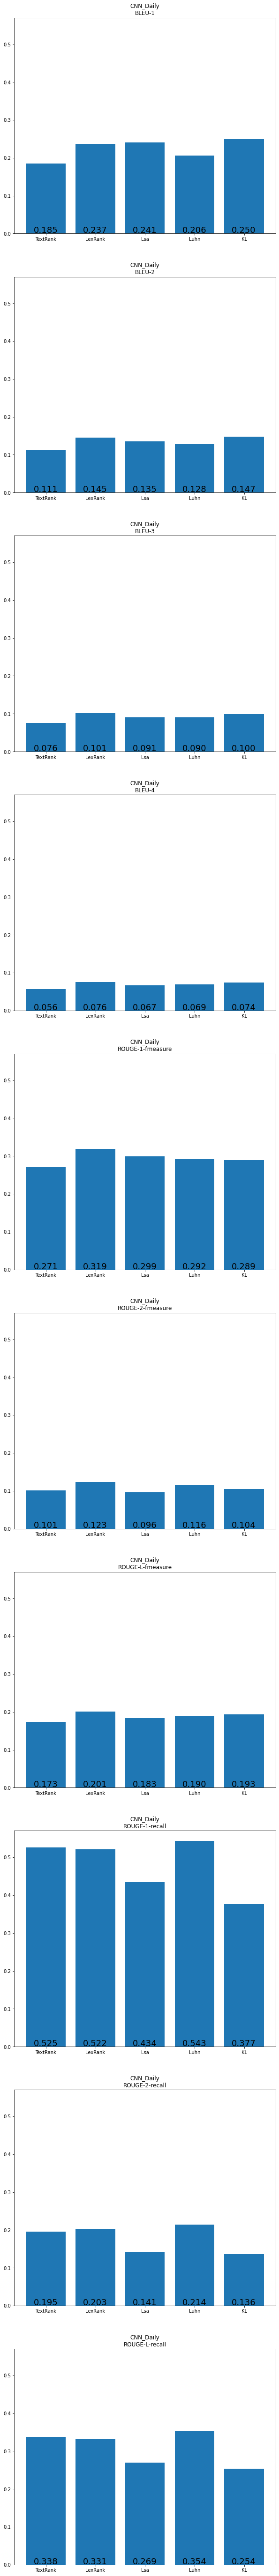

In [8]:
fig, axes = plt.subplots(len(metric_names), 1, sharey=True)
fig.set_size_inches(10, 10 * len(metric_names))
for i, metric in enumerate(metric_names):
    axes[i].set_title(ds_name + "\n" + metric)
    # axes[i].set_ylim(0.5, )
    axes[i].bar(
        metric_model[metric].keys(),
        metric_model[metric].values())
    bar_labels = list(map(lambda m: "{:.3f}".format(m), metric_model[metric].values()))
    for j, v in enumerate(bar_labels):
        axes[i].text(j-0.25,
                  0.002,
                  bar_labels[j],
                  fontsize=18,
                  )


In [10]:
# Glove :)

p = "bench_results_cnn_daily_glove.json"
_tmp = json.load(open(p, 'r'))
glove_results = {}
for prep in _tmp:
    glove_results[prep] = {}
    for model in _tmp[prep]:
        glove_results[prep][model] = _tmp[prep][model]["<src.metrics.GloVeCosineSimilarity.GloveCosineSimilarity object at 0x7fad74e615b0>"]
pprint(glove_results)

{'CourpusPreprocessor(mid)': {'KL': 0.959326922332254,
                              'LexRank': 0.9637104898574087,
                              'Lsa': 0.9591154715457639,
                              'Luhn': 0.9648621010475277,
                              'TextRank': 0.9642971588510145},
 'CourpusPreprocessor(nothing)': {'KL': 0.9608362808068414,
                                  'LexRank': 0.964222190008423,
                                  'Lsa': 0.9601505125656157,
                                  'Luhn': 0.965693064039443,
                                  'TextRank': 0.9646427703462745},
 'CourpusPreprocessor(simple)': {'KL': 0.9592439981662233,
                                 'LexRank': 0.9636250815622147,
                                 'Lsa': 0.9584050055881076,
                                 'Luhn': 0.9650520478365544,
                                 'TextRank': 0.9638819213923664},
 'CourpusPreprocessor(strong)': {'KL': 0.9162862563625689,
                        

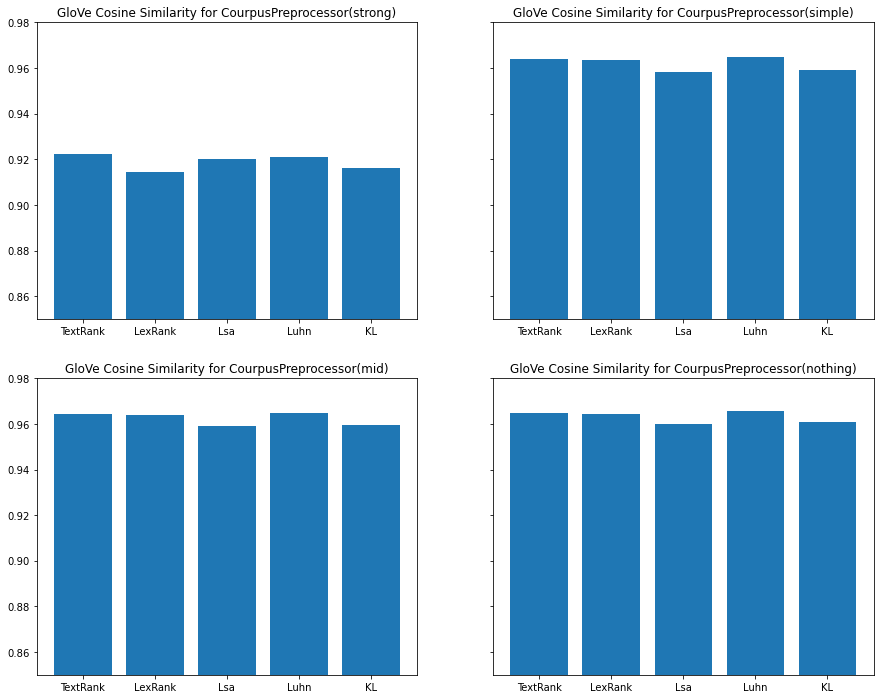

In [113]:
# fig, axes = plt.subplots(len(glove_results), 1, sharey=True)
fig, axes = plt.subplots(2, 2, sharey=True)
fig.set_size_inches(15, 3 * len(glove_results))

for i, prep in enumerate(glove_results):
    glove_prep = glove_results[prep]
    axes[i%2, i//2].set_title(f"GloVe Cosine Similarity for {prep}")
    axes[i%2, i//2].bar(
        glove_prep.keys(),
        glove_prep.values()
    )
    plt.ylim(0.85, 0.98)
plt.show()


# glove_simple_prep = glove_results['CourpusPreprocessor(simple)']
# plt.title("GloVe Cosine Similarity")
# plt.bar(
#     glove_simple_prep.keys(),
#     glove_simple_prep.values()
# )
# plt.ylim(0.94, 0.98)

In [114]:
# Deep models
gpt2_10K_results = json.load(open("metrics/gpt2_10K_metrics.json", 'r'))
gpt2_50K_results = json.load(open("metrics/gpt2_50K_metrics.json", 'r'))
gpt_10K_results = json.load(open("metrics/openai-gpt_10K_metrics.json", 'r'))

deep_results = {
    "gpt2_small_ds": gpt2_10K_results,
    "gpt2_big_ds": gpt2_50K_results,
    "gpt_small_ds": gpt_10K_results,
}

deep_model_names = list(deep_results.keys())
print(f"Deep model names: {deep_model_names}")

for model in deep_results:
    deep_results[model].pop("decoder_cnf")

pprint(deep_results)

Deep model names: ['gpt2_small_ds', 'gpt2_big_ds', 'gpt_small_ds']
{'gpt2_big_ds': {'BLEU-1': 0.2685607717142339,
                 'BLEU-2': 0.14041732668661602,
                 'BLEU-3': 0.0810342739927884,
                 'BLEU-4': 0.05013362764304713,
                 'ROUGE-1-fmeasure': 0.26433564611032934,
                 'ROUGE-1-recall': 0.2649267759104025,
                 'ROUGE-2-fmeasure': 0.07163987090099673,
                 'ROUGE-2-recall': 0.07223826846513387,
                 'ROUGE-L-fmeasure': 0.1906946892053814,
                 'ROUGE-L-recall': 0.19122736127355452},
 'gpt2_small_ds': {'BLEU-1': 0.26539233416853597,
                   'BLEU-2': 0.13582302423391,
                   'BLEU-3': 0.07926573297215299,
                   'BLEU-4': 0.05070795273338491,
                   'ROUGE-1-fmeasure': 0.2654797960497395,
                   'ROUGE-1-recall': 0.2655966535816715,
                   'ROUGE-2-fmeasure': 0.06888207799538895,
                   'ROUGE-2-r

In [115]:
deep_results_reverse = {}

for metric in metric_names:
    deep_results_reverse[metric] = {}
    for model in deep_model_names:
        deep_results_reverse[metric][model] = deep_results[model][metric]
pprint(deep_results_reverse)

{'BLEU-1': {'gpt2_big_ds': 0.2685607717142339,
            'gpt2_small_ds': 0.26539233416853597,
            'gpt_small_ds': 0.17774030354131531},
 'BLEU-2': {'gpt2_big_ds': 0.14041732668661602,
            'gpt2_small_ds': 0.13582302423391,
            'gpt_small_ds': 0.09319544007559874},
 'BLEU-3': {'gpt2_big_ds': 0.0810342739927884,
            'gpt2_small_ds': 0.07926573297215299,
            'gpt_small_ds': 0.0594825618225856},
 'BLEU-4': {'gpt2_big_ds': 0.05013362764304713,
            'gpt2_small_ds': 0.05070795273338491,
            'gpt_small_ds': 0.044124343261924714},
 'ROUGE-1-fmeasure': {'gpt2_big_ds': 0.26433564611032934,
                      'gpt2_small_ds': 0.2654797960497395,
                      'gpt_small_ds': 0.1734421144639564},
 'ROUGE-1-recall': {'gpt2_big_ds': 0.2649267759104025,
                    'gpt2_small_ds': 0.2655966535816715,
                    'gpt_small_ds': 0.17930350133222075},
 'ROUGE-2-fmeasure': {'gpt2_big_ds': 0.07163987090099673,
         

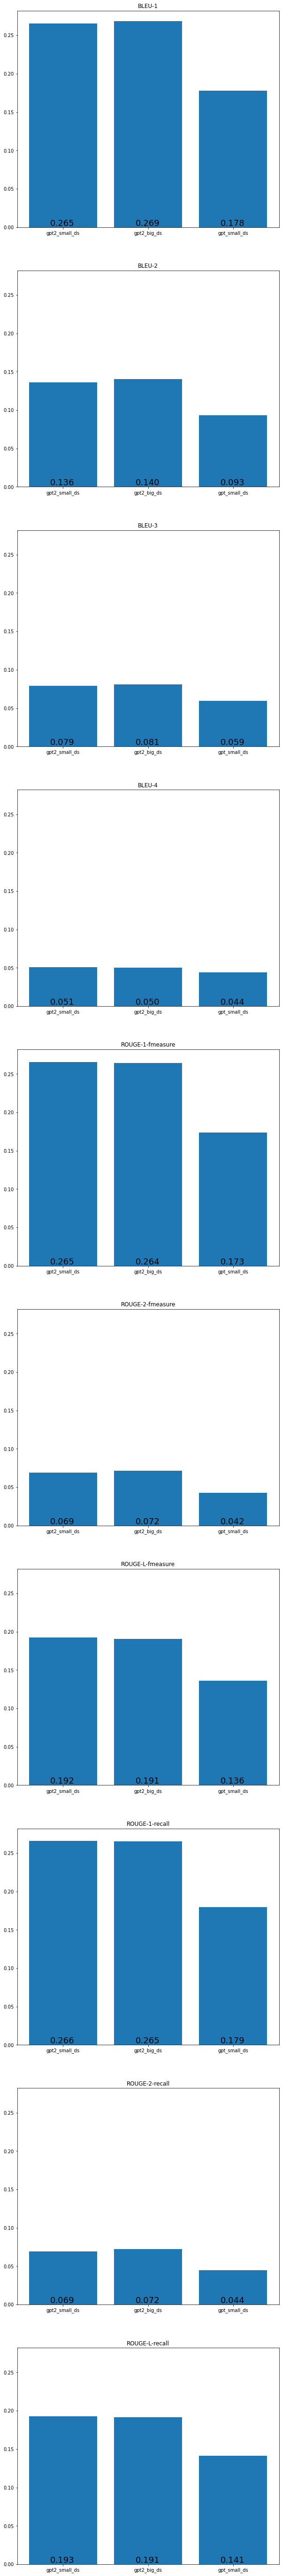

In [116]:
fig, axes = plt.subplots(len(metric_names), 1, sharey=True)
fig.set_size_inches(10, 10 * len(metric_names))
for i, metric in enumerate(metric_names):
    axes[i].set_title(metric)
    # axes[i].set_ylim(0.5, )
    axes[i].bar(
        deep_results_reverse[metric].keys(),
        deep_results_reverse[metric].values())
    bar_labels = list(map(lambda m: "{:.3f}".format(m), deep_results_reverse[metric].values()))
    for j, v in enumerate(bar_labels):
        axes[i].text(j-0.15,
                  0.002,
                  bar_labels[j],
                  fontsize=18,
                  )